# Setup

## Imports

In [1]:
import magnet as mag
import magnet.debug as mdb

Running your code on a slow, boring CPU.
Make some money and buy yourself a GPU, will ya?

Pro Tip: If you're a poor old hag like me, use a cloud provider.


In [2]:
from magnet.training import SupervisedTrainer
from magnet.training.callbacks import Monitor, Validate, Checkpoint

In [3]:
from copywriter.data import NicheData
from copywriter.hparams import (seq_len, encoder_dim, vocab_size, num_workers,
                                hidden_sizes, embedding_dim, batch_size)
from copywriter.models import EncoderReadymade, Decoder
from copywriter.nlp import get_nlp

## Definitions

In [4]:
jtplot_style()

In [5]:
DIR_CHECKPOINTS = DIR_MAIN / 'checkpoints'
DIR_CHECKPOINTS.mkdir(exist_ok=True, parents=True)

## Load Data

In [6]:
nlp = get_nlp('en_core_web_lg', vocab_size, DIR_CHECKPOINTS / 'vocab')

In [7]:
encoder = EncoderReadymade(vocab_size).to(mag.device)

Vocab size : 10000


In [8]:
data = NicheData('content-marketing', nlp, encoder, seq_len, encoder_dim, num_workers)

Downloading



Parsing
Article `download()` failed with 404 Client Error: Not Found for url: https://greymeter.com/internships/online-content-writer-december-greymeter-services-pvt-ltd on URL https://greymeter.com/internships/online-content-writer-december-greymeter-services-pvt-ltd


Article `download()` failed with 403 Client Error: Forbidden for url: http://www.business2community.com/content-marketing/6-predictions-future-content-marketing-2016-01392001 on URL http://www.business2community.com/content-marketing/6-predictions-future-content-marketing-2016-01392001
Article `download()` failed with 404 Client Error: Not Found for url: https://blog.gomore.dk/talent/social-media-content-marketing-specialist-danmark/ on URL https://blog.gomore.dk/talent/social-media-content-marketing-specialist-danmark/
Article `download()` failed with 404 Client Error: Not Found for url: https://www.copyblogger.com/rainmaker-standard/ on URL http://www.copyblogger.com/rainmaker-standard/
Article `download()` failed with 405 Client Error: Not Allowed for url: http://www.axs.com/ on URL http://www.examiner.com/article/strategy-not-volume-increases-the-value-of-content-marketing
Article `download()` failed with 403 Client Error: Forbidden for url: http://www.business2community.com/conten

Article `download()` failed with 404 Client Error: Not Found for url: http://www.mig.se/nyheter/frukostklubben-content-marketing-412/ on URL http://www.mig.se/nyheter/frukostklubben-content-marketing-412/
Article `download()` failed with 403 Client Error: Forbidden for url: http://www.business2community.com/podcasts/content-marketing-podcast-unlocking-power-microcontent-interview-short-format-video-expert-frank-danna-01392691 on URL http://www.business2community.com/podcasts/content-marketing-podcast-unlocking-power-microcontent-interview-short-format-video-expert-frank-danna-01392691
Article `download()` failed with 404 Client Error: Not Found for url: http://blog.thinkhandy.com/the-link-between-content-marketing-and-sales-enablement on URL http://blog.thinkhandy.com/the-link-between-content-marketing-and-sales-enablement
Article `download()` failed with 404 Client Error: Not Found for url: http://www.mediaplanet.com/denmark/blog/content-marketing-blog/content-marketing-trends-2016/ o

Article `download()` failed with 404 Client Error: Not Found for url: http://smoof.io/blog/we-are-hiring-content-and-marketing-assistant/ on URL http://smoof.io/blog/we-are-hiring-content-and-marketing-assistant/
Article `download()` failed with 404 Client Error: Not Found for url: https://socialmedialondon.co.uk/content-marketing-2016/ on URL http://socialmedialondon.co.uk/content-marketing-2016/
Article `download()` failed with 404 Client Error: Not Found for url: http://albertmensingacreative.nl/wat-is-content-marketing/ on URL http://albertmensingacreative.nl/wat-is-content-marketing/
Article `download()` failed with 410 Client Error: Gone for url: https://www.enterpriseinnovation.net/article/what-marketers-can-learn-linkedin-about-value-content-182621200 on URL http://enterpriseinnovation.net/article/what-marketers-can-learn-linkedin-about-value-content-182621200
You must `download()` an article first!
You must `download()` an article first!
You must `download()` an article first!

Article `download()` failed with 404 Client Error: Not Found for url: https://asiacontentmarketing.net/Learn/Industry-Insights/what-does-2016-hold-for-content-marketing-in-asia-acma-predicts on URL http://asiacontentmarketing.net/Learn/Industry-Insights/what-does-2016-hold-for-content-marketing-in-asia-acma-predicts
Article `download()` failed with 404 Client Error: Not Found for url: http://contentools.com/marketing-podcasts-and-blabs/marketing-blabs-content-hacks-intercom-w-sara-yin-and-anthony-yu/ on URL http://contentools.com/marketing-podcasts-and-blabs/marketing-blabs-content-hacks-intercom-w-sara-yin-and-anthony-yu/
Article `download()` failed with 404 Client Error: Not Found for url: http://tfmainsights.com/from-buzzfeed-to-the-new-york-times-4-ways-interactive-content-is-redefining-marketing/ on URL http://tfmainsights.com/from-buzzfeed-to-the-new-york-times-4-ways-interactive-content-is-redefining-marketing/
You must `download()` an article first!
Article `download()` failed 

You must `download()` an article first!
Article `download()` failed with 404 Client Error: Not Found for url: https://neweumarket.com/youtube-in-talks-about-red-content/ on URL http://neweumarket.com/youtube-in-talks-about-red-content/
Article `download()` failed with 404 Client Error: Not Found for url: http://www.thewebvideocompany.com/web-video-articles/why-the-evolution-of-content-marketing-affects-your-global-marketing-efforts on URL http://www.thewebvideocompany.com/web-video-articles/why-the-evolution-of-content-marketing-affects-your-global-marketing-efforts
Article `download()` failed with 404 Client Error: Not Found for url: http://blog.bluewavemarketing.com/4-factors-necessary-for-a-strong-integrated-content-marketing-plan on URL http://blog.bluewavemarketing.com/4-factors-necessary-for-a-strong-integrated-content-marketing-plan
Article `download()` failed with 404 Client Error: Not Found for url: http://info.crescendocontent.com/less-than-obvious-content-marketing-metrics-r

You must `download()` an article first!
Article `download()` failed with 404 Client Error: Not Found for url: http://www.qualinsoft.com/blog/how-to-manage-your-content-for-social-media-marketing/ on URL http://qualinsoft.com/blog/how-to-manage-your-content-for-social-media-marketing/
You must `download()` an article first!
You must `download()` an article first!
Article `download()` failed with 404 Client Error: Not Found for url: https://blog.crocodilemarketing.com.au/my-12-principles-of-using-inbound-marketing on URL http://blog.crocodilemarketing.com.au/What-You-Should-Know-About-Content-Marketing
Article `download()` failed with 404 Client Error: Not Found for url: http://sjc.marketing/make-content-marketing-work-for-your-company/ on URL http://susanjcampbell.com/make-content-marketing-work-for-your-company/
You must `download()` an article first!
Article `download()` failed with 404 Client Error: Not Found for url: https://events.com/blog/event-marketing/2016-digital-marketing-tre

Article `download()` failed with 500 Server Error: Internal Server Error for url: http://vacationrental.intweetiv.com/view?title=5+Reasons+to+Add+Curation+to+Your+Content+Marketing&iframe=http%3A%2F%2Fwww.business2community.com%2Fcontent-marketing%2F5-reasons-add-curation-content-marketing-01389651 on URL http://vacationrental.intweetiv.com/view?title=5+Reasons+to+Add+Curation+to+Your+Content+Marketing&iframe=http%3A%2F%2Fwww.business2community.com%2Fcontent-marketing%2F5-reasons-add-curation-content-marketing-01389651
Article `download()` failed with 403 Client Error: Forbidden for url: http://www.answerscout.com/webinar-calendar?show=&title=How-to-Optimize-your-Marketing-Content-for-International-Markets&xP=10&mode=event&eid=1835&evD=2015-12-08 on URL http://www.answerscout.com/webinar-calendar?show=&title=How-to-Optimize-your-Marketing-Content-for-International-Markets&xP=10&mode=event&eid=1835&evD=2015-12-08
Article `download()` failed with 404 Client Error: Not Found for url: http

You must `download()` an article first!
You must `download()` an article first!
Article `download()` failed with 404 Client Error: Not Found for url: https://www.getcurriculumdevelopmentjobs.com/looking-for-digital-marketing-content-specialist-san-ramon-california-80684416.htm on URL http://www.getcurriculumdevelopmentjobs.com/looking-for-digital-marketing-content-specialist-san-ramon-california-80684416.htm
You must `download()` an article first!
You must `download()` an article first!
You must `download()` an article first!
You must `download()` an article first!
You must `download()` an article first!
You must `download()` an article first!
You must `download()` an article first!
You must `download()` an article first!
You must `download()` an article first!
You must `download()` an article first!
You must `download()` an article first!
Article `download()` failed with 404 Client Error: Not Found for url: https://stellenangebot.monster.de/v2/job/expired?JobID=160578278 on URL http:/

Article `download()` failed with 404 Client Error: Not Found for url: http://www.styla.com/blog/story/from-content-marketing-to-content-commerce_970727 on URL http://www.styla.com/blog/story/from-content-marketing-to-content-commerce_970727
You must `download()` an article first!
Article `download()` failed with 404 Client Error: Not Found for url: https://orangecounty.craigslist.org/wri/5351693002.html on URL http://orangecounty.craigslist.org/wri/5351693002.html
You must `download()` an article first!

Got 66% of the articles.
Encoding


/home/vaisakh/copywriter/InferSent/models.py:222: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  sentences[stidx:stidx + bsize]), volatile=True)


In [ ]:
del encoder, nlp

# Create Model

In [10]:
decoder = Decoder(encoder_dim, hidden_sizes, vocab_size + 1, seq_len).to(mag.device)

In [11]:
x, y_true = next(data(batch_size))

In [12]:
with mdb.shape():
    with mag.eval(decoder): 
        y = decoder(x.to(mag.device))
        print(y.shape)

{'x': (512, 4096)}
1. hidden_size = self.convs[0].in_channels 

{'x': (512, 4096)}
2. x = F.relu(self.fc(x).view(x.shape[0], hidden_size, -1)) 

{'x': (512, 1000, 5)}
4. for conv in self.convs[:-1]: x = F.relu(conv(x)) 

{'x': (512, 1000, 5)}
4. for conv in self.convs[:-1]: x = F.relu(conv(x)) 

{'x': (512, 1000, 5)}
5. return self.convs[-1](x) 

{'x': (512, 1000, 5)}
return. return self.convs[-1](x) 

torch.Size([512, 10001, 5])


In [13]:
class NicheTrainer(SupervisedTrainer):
    def get_loss(self, dataloader, validation=False):
        model = self.models[0]

        x, y = next(dataloader)
        y_pred = model(x.to(mag.device))

        loss = self.loss(y_pred, y.to(mag.device))

        self.callbacks('write_stats', trainer=self, key='loss', value=loss.item(), validation=validation, buffer_size=len(dataloader))
        if self.metric is not None:
            self.callbacks('write_stats', trainer=self, key=self.metric[0], value=self.metric[1](y_pred, y.to(mag.device)).item(), validation=validation, buffer_size=len(dataloader))

        return loss

In [14]:
trainer = NicheTrainer(decoder, metric='accuracy')

/home/vaisakh/anaconda3/envs/copy/lib/python3.6/site-packages/matplotlib/ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


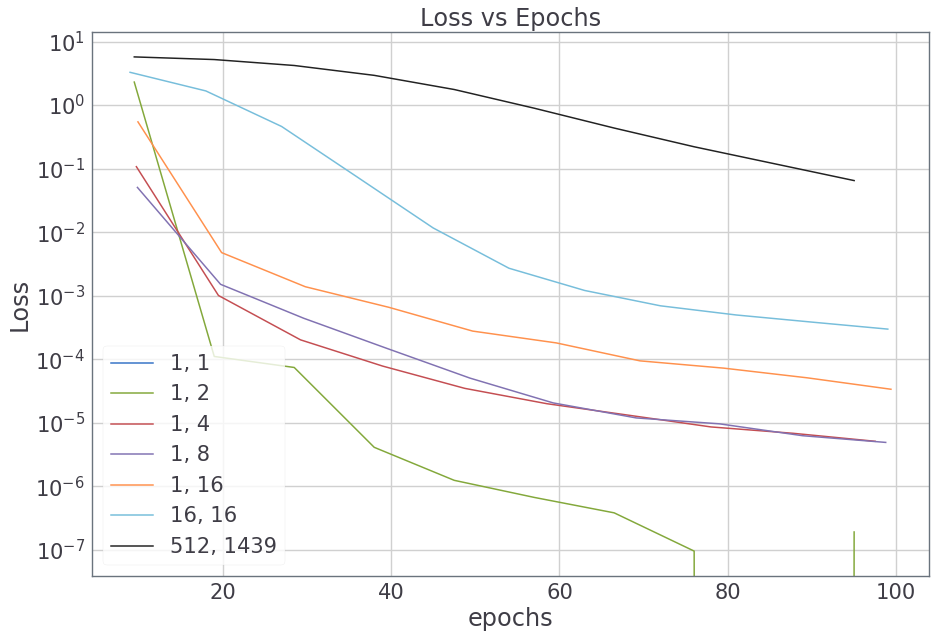

In [15]:
mdb.overfit(trainer, data, batch_size)

# Train

In [21]:
callbacks = [Validate(data(batch_size, mode='val'), NicheTrainer.validate),
            Monitor(),
            Checkpoint(DIR_CHECKPOINTS / 'trainer')]

In [ ]:
try: trainer.train(data(16, shuffle=True), 93.8, callbacks)
except: pass

In [ ]:
!gcloud compute instances stop vai

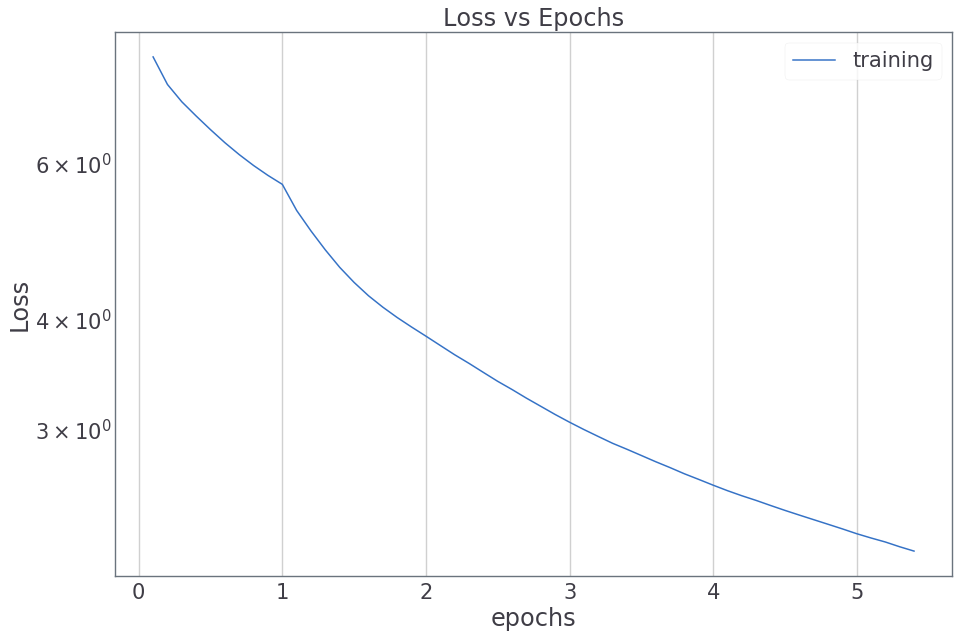

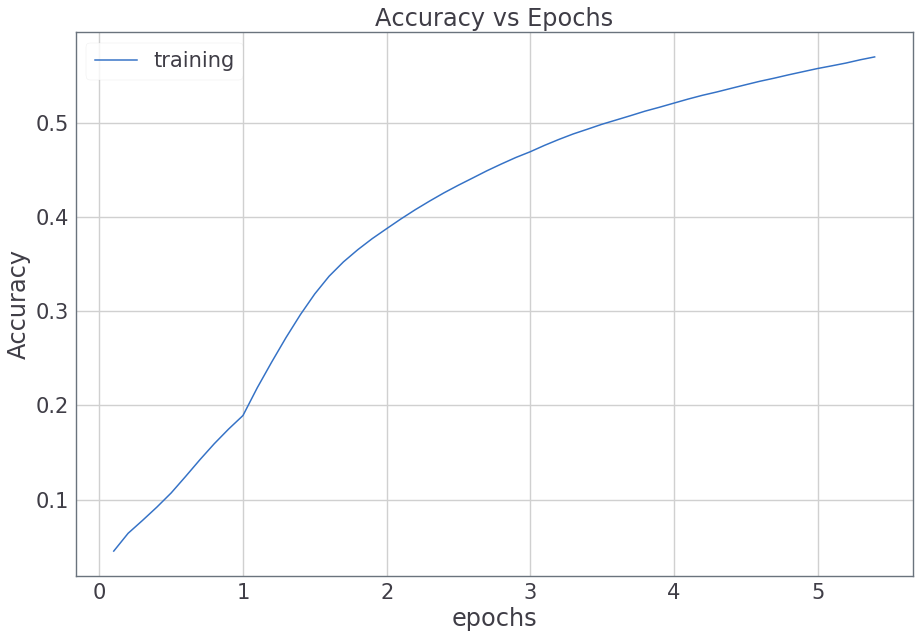

In [40]:
trainer.callbacks.find('monitor').history.show('loss', log=True, x_key='epochs')
trainer.callbacks.find('monitor').history.show('accuracy', x_key='epochs')

In [18]:
#trainer.callbacks.find('checkpoint').clear_state()